In [1]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
# Helpful
import tqdm

# Visualization
import matplotlib.pyplot as plt

# My Methods
from src.utils.CRPS import *
from src.utils.data_split import *
from src.models.EMOS import *
from src.models.EMOS_global.EMOS_global_load_score import *
from src.models.EMOS_global.EMOS_global_load_model import *
import data.raw.load_data_raw as ldr
import data.processed.load_data_processed as ldp
import data.processed.load_data_processed_denormed as ldpd
from src.models.CRPS_baseline.CRPS_load import *

2023-05-30 15:07:18.713401: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/opt/anaconda3/lib/
2023-05-30 15:07:18.713422: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


<IPython.core.display.Javascript object>

### 1. Load scores

In [3]:
EMOS_glob_scores_t2m = EMOS_global_load_score("t2m")
EMOS_glob_scores_ws10 = EMOS_global_load_score("ws10")

<IPython.core.display.Javascript object>

###  2. EMOS global scores worse with lead_time?

#### 2.1 t2m - visualization

In [4]:
def lead_time_score(score, title):
    scores = []
    for i in range(len(score)):
        scores.append(score[i].mean())
    fig, ax = plt.subplots()
    ax.scatter(range(31), scores)
    ax.set_title(title)
    ax.set_xlabel("lead_time")
    ax.set_ylabel("mean_score")
    plt.xticks(rotation=90)
    plt.show()
    return scores


def lead_time_score_chunks(ax, score_means, title):
    chunks = [score_means[i : i + 5] for i in range(0, 25, 5)] + [score_means[-6:]]
    score_means_5 = [np.mean(chunk) for chunk in chunks]

    # Plot horizontal lines
    for i, mean in enumerate(score_means_5):
        if i != len(score_means_5) - 1:
            ax.hlines(mean, i * 5, i * 5 + 5, colors="b")
        else:  # the last line should span 6 points
            ax.hlines(mean, i * 5, i * 5 + 6, colors="b")

    # Set the title and labels
    ax.set_title(title)
    ax.set_xlabel("Lead_time")
    ax.set_ylabel("Mean 5 scores")
    plt.xticks(rotation=90)

    # Show the plot
    plt.show()
    return score_means_5


def score_means(score):
    scores = []
    for i in range(len(score)):
        scores.append(score[i].mean())
    chunks = [scores[i : i + 5] for i in range(0, 25, 5)] + [scores[-6:]]
    score_means_5 = [np.mean(chunk) for chunk in chunks]
    return scores, score_means_5

<IPython.core.display.Javascript object>

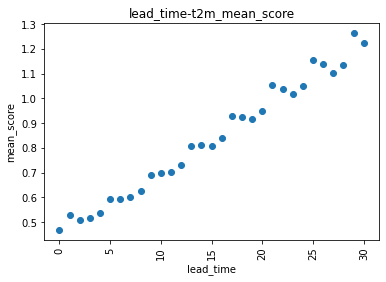

<IPython.core.display.Javascript object>

In [5]:
t2m_mean_scores = lead_time_score(EMOS_glob_scores_t2m, "lead_time-t2m_mean_score")

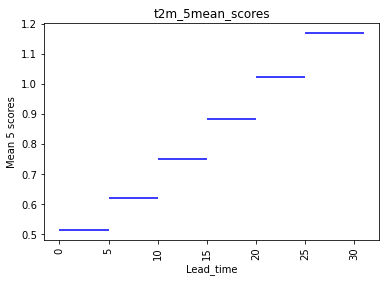

<IPython.core.display.Javascript object>

In [6]:
fig, ax = plt.subplots()
t2m_score_chunks = lead_time_score_chunks(ax, t2m_mean_scores, "t2m_5mean_scores")

#### 2.2 ws10 - visualization

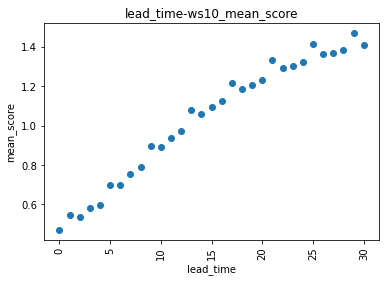

<IPython.core.display.Javascript object>

In [7]:
ws10_mean_scores = lead_time_score(EMOS_glob_scores_ws10, "lead_time-ws10_mean_score")

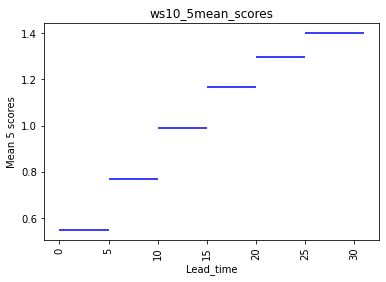

<IPython.core.display.Javascript object>

In [8]:
fig, ax = plt.subplots()
ws10_score_chunks = lead_time_score_chunks(ax, ws10_mean_scores, "ws10_5mean_scores")

### 3. Bar Chart to compare scores

In [9]:
t2m_crps_scores = crps_load_lead_lat_lon("t2m")
ws10_crps_scores = crps_load_lead_lat_lon("ws10")
t2m_crps_scores_mean, t2m_crps_scores_mean_5 = score_means(t2m_crps_scores)
ws10_crps_scores_mean, ws10_crps_scores_mean_5 = score_means(ws10_crps_scores)

<IPython.core.display.Javascript object>

#### 3.1 Bar Chart for all lead_times

In [15]:
import matplotlib.pyplot as plt
import numpy as np


import matplotlib.pyplot as plt
import numpy as np

def plt_bar_chart_arrays(array1, array2, N, label_1, label_2):
    if len(array1) != N or len(array2) != N:
        print(f"Expected arrays of length {N}, but got {len(array1)} and {len(array2)}")
        return
    
    ind = np.arange(N)  # the x locations for the groups
    width = 0.35        # the width of the bars

    fig, ax = plt.subplots()

    rects1 = ax.bar(ind - width/2, array1, width, label=label_1)
    rects2 = ax.bar(ind + width/2, array2, width, label=label_2)

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_xlabel('Lead_time')
    ax.set_title('Scores by Array and Index')
    ax.set_xticks(ind)
    ax.set_xticklabels([str(i) for i in range(N)])
    plt.xticks(rotation=90)
    ax.legend()

    plt.show()


<IPython.core.display.Javascript object>

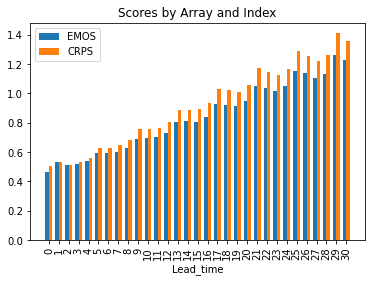

<IPython.core.display.Javascript object>

In [16]:
# 1. t2m
plt_bar_chart_arrays(t2m_mean_scores, t2m_crps_scores_mean, 31, "EMOS", "CRPS")

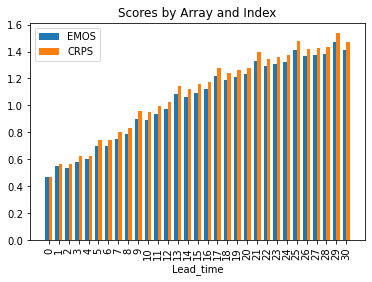

<IPython.core.display.Javascript object>

In [17]:
# 2. ws10
plt_bar_chart_arrays(ws10_mean_scores, ws10_crps_scores_mean, 31, "EMOS", "CRPS")

#### 3.2 Bar Chart for 5 mean lead_times

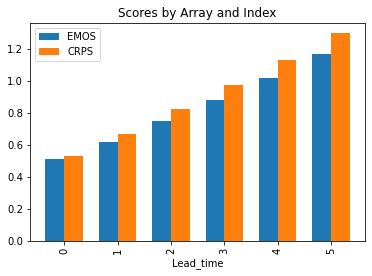

<IPython.core.display.Javascript object>

In [18]:
# 1. t2m
plt_bar_chart_arrays(t2m_score_chunks, t2m_crps_scores_mean_5, 6, "EMOS", "CRPS")

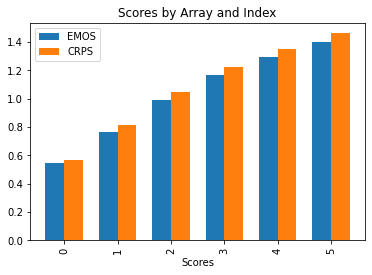

<IPython.core.display.Javascript object>

In [14]:
# 2. ws10
plt_bar_chart_arrays(ws10_score_chunks, ws10_crps_scores_mean_5, 6, "EMOS", "CRPS")